## Observations and Insights 

* It looks like the mice treated with Capomulin and Ramicane had better results than the rest of the treatments. We can deduce that because they have the lowest mean, which indicates a reduction in the tumor volume.  Besides, their variance is lower than the rest; hence their readings are less dispersed. 
* The sample is representative of gender because it has almost the same amount of females as males.
* Through the box plot, we can confirm that the better results in the reduction of the tumor are the treatments with Capomulin and Ramicane
* For the most successful treatment, Capomulin, the mouse with better results is "s185" because it has the most significant decrease in the tumor volume. The one with the worst outcomes is "i557" because the volume of its tumor reached almost 48mm, being that it was 45mm initially.  
* By analyzing the correlation between Average Tumor Volume and weight, we can conclude that these two factors are directly related (r=.842). The higher the weight, the higher the average tumor volume.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results,how="inner")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
group_by_mice = combined_data.groupby('Mouse ID')
number_mice = group_by_mice.count()
x=number_mice['Drug Regimen'].count()

print(f"The number of mice are: {x}")

The number of mice are: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

to_duplicate_mouse = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'],keep=False)]
duplicate_mouse = to_duplicate_mouse.iloc[0,0]

print(f"The duplicate mice ID is:  {duplicate_mouse}")

The duplicate mice ID is:  g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
is_g989 = combined_data.loc[:, 'Mouse ID'] == duplicate_mouse
df_g989 = combined_data.loc[is_g989]
df_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"]!=duplicate_mouse,:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
group_by_mice = clean_data.groupby('Mouse ID')
number_mice = group_by_mice.count()
x=number_mice['Drug Regimen'].count()

print(f"The number of mice are: {x}")

The number of mice are: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

group_by_regimen = clean_data.groupby('Drug Regimen')

media_regimen = group_by_regimen['Tumor Volume (mm3)'].mean()

median_regimen = group_by_regimen['Tumor Volume (mm3)'].median()

stdv_regimen = group_by_regimen['Tumor Volume (mm3)'].std()

var_regimen = group_by_regimen['Tumor Volume (mm3)'].var()

sem_regimen = group_by_regimen['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Volume mean":media_regimen,
                             "Volume median":median_regimen,
                           "Volume Variance ":var_regimen,
                          "Volume Stdev":stdv_regimen,
                          "Standard errors":sem_regimen})

summary_df


,Volume mean,Volume median,Volume Variance,Volume Stdev,Standard errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

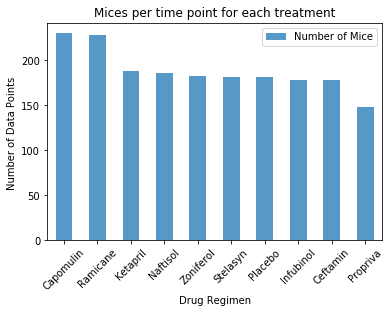

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

group_by_regimen_timepoint = clean_data.groupby(['Drug Regimen','Timepoint'])
mice_regimen = group_by_regimen_timepoint.count()
group_by_regimen_only = mice_regimen.groupby(['Drug Regimen'])
regimen_only= group_by_regimen_only.sum()
mice_per_regimen = regimen_only['Mouse ID'].sort_values(ascending=False)


df = pd.DataFrame(mice_per_regimen)
ax = df.plot.bar(alpha=0.75)
plt.ylabel("Number of Data Points ")
plt.title('Mices per time point for each treatment')
plt.xticks(rotation=45)
ax.legend(["Number of Mice"])

plt.show()




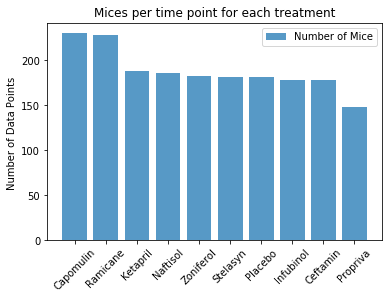

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot
x_lables = mice_per_regimen.index.values.tolist()
y_pos = np.arange(len(x_lables))
y_values = mice_per_regimen.values.tolist()

plt.bar(y_pos, y_values, align='center', alpha=0.75)
plt.xticks(y_pos, x_lables,rotation=45)
plt.ylabel("Number of Data Points ")
plt.title('Mices per time point for each treatment')
plt.legend(["Number of Mice"])
plt.figsize=(10,5)

plt.show()

## Pie Plots

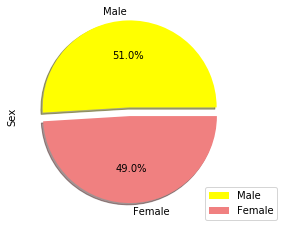

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_by_sex = clean_data['Sex'].value_counts()

group_by_sex.plot.pie(y='Mouse ID',autopct="%1.1f%%",colors=['yellow','lightcoral'],explode = (0.1, 0),
               shadow=True)
plt.legend(loc="lower right",bbox_to_anchor=(1.2,0))

plt.show()

In [12]:
group_by_sex

Male      958
Female    922
Name: Sex, dtype: int64

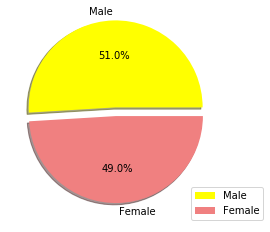

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = group_by_sex.index.values.tolist()
mice_per_gender = group_by_sex.values.tolist()

# Pie chart
plt.pie(mice_per_gender,labels=gender_label,colors=['yellow','lightcoral'],explode = (0.1, 0),
       autopct="%1.1f%%", shadow=True)
plt.legend(loc="lower right",bbox_to_anchor=(1.2,0))

#Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers

# Capomulin analysis 
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]

group_by_raton = capomulin_df.groupby(['Mouse ID'])
time_max = group_by_raton['Timepoint'].max()
time_max_df = pd.DataFrame(time_max).reset_index()

capomulin_final_vol= capomulin_df.merge(time_max_df,how="right")

# IQR  
quartiles = capomulin_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,3)
print(f"Capomulin IQR is {iqr}")

#Upper and lower bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Outliers
capomulin_outliers=[]
capomulin_vol_list = capomulin_final_vol["Tumor Volume (mm3)"]

for vol in capomulin_vol_list:
    if (vol<lower_bound) | (vol>upper_bound):
        capomulin_outliers.append(vol)

if len(capomulin_outliers)==0:
    print("There are no outliers for Capomulin Drug Treatment")
else:
    print("The outlier(s) for Capomulin Drug Treatment: ")
    print(capomulin_outliers)


Capomulin IQR is 7.782
There are no outliers for Capomulin Drug Treatment


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers

#Ramicane analysis
ramicane_df = clean_data.loc[(clean_data["Drug Regimen"] == "Ramicane")]

group_by_raton = ramicane_df.groupby(['Mouse ID'])
time_max = group_by_raton['Timepoint'].max()
time_max_df = pd.DataFrame(time_max).reset_index()

ramicane_final_vol= ramicane_df.merge(time_max_df,how="right")


# IQR  
quartiles = ramicane_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,3)
print(f"Ramicane IQR is {iqr}")

#Upper and lower bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Outliers
ramicane_outliers=[]
ramicane_vol_list = ramicane_final_vol["Tumor Volume (mm3)"]

for vol in ramicane_vol_list:
    if (vol<lower_bound) | (vol>upper_bound):
        ramicane_outliers.append(vol)

if len(ramicane_outliers)==0:
    print("There are no outliers for Ramicane Drug Treatment")
else:
    print("Potential outlier(s) for Ramicane Drug Treatment: ")
    print(ramicane_outliers)


Ramicane IQR is 9.099
There are no outliers for Ramicane Drug Treatment


In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers

#Infubinol analysis
infubinol_df = clean_data.loc[(clean_data["Drug Regimen"] == "Infubinol")]

group_by_raton = infubinol_df.groupby(['Mouse ID'])
time_max = group_by_raton['Timepoint'].max()
time_max_df = pd.DataFrame(time_max).reset_index()

infubinol_final_vol= infubinol_df.merge(time_max_df,how="right")


# IQR  
quartiles = infubinol_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,3)
print(f"Infubinol IQR is {iqr}")

#Upper and lower bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Outliers
infubinol_outliers=[]
infubinol_vol_list = infubinol_final_vol["Tumor Volume (mm3)"]

for vol in infubinol_vol_list:
    if (vol<lower_bound) | (vol>upper_bound):
        infubinol_outliers.append(vol)

if len(infubinol_outliers)==0:
    print("There are no outliers for Infubinol Drug Treatment")
else:
    print("Potential outlier(s) for Infubinol Drug Treatment: ")
    print(infubinol_outliers)

Infubinol IQR is 11.477
Potential outlier(s) for Infubinol Drug Treatment: 
[36.321345799999996]


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers

#Ceftamin analysis
ceftamin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Ceftamin")]

group_by_raton = ceftamin_df.groupby(['Mouse ID'])
time_max = group_by_raton['Timepoint'].max()
time_max_df = pd.DataFrame(time_max).reset_index()

ceftamin_final_vol= ceftamin_df.merge(time_max_df,how="right")

# IQR  
quartiles = ceftamin_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,3)
print(f"Ceftamin IQR is {iqr}")


#Upper and lower bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Outliers
ceftamin_outliers=[]
ceftamin_vol_list = ceftamin_final_vol["Tumor Volume (mm3)"]

for vol in ceftamin_vol_list:
    if (vol<lower_bound) | (vol>upper_bound):
        ceftamin_outliers.append(vol)

if len(ceftamin_outliers)==0:
    print("There are no outliers for Ceftamin Drug Treatment")
else:
    print("Potential outlier(s) for Ceftamin Drug Treatment: ")
    print(ceftamin_outliers)



Ceftamin IQR is 15.578
There are no outliers for Ceftamin Drug Treatment


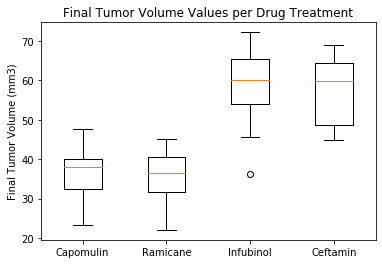

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot ([capomulin_vol_list,ramicane_vol_list, infubinol_vol_list, ceftamin_vol_list])
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume Values per Drug Treatment')
plt.show()

## Line and Scatter Plots

The mice that were treated with Capomulin are:
s185, x401, m601, f966, u364
y793, r554, m957, t565, i738
w914, g288, l897, b742, b128
j246, j119, w150, v923, g316
s710, l509, r944, i557, r157

 Select a mouse from the above list to analyze:  l897


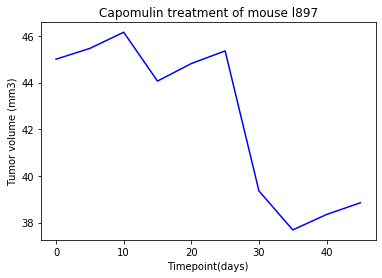

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse_list = capomulin_final_vol["Mouse ID"]
capomulin_mouse_list.to_string(index=False).replace("\n",",")
print('The mice that were treated with Capomulin are:')
counter = 1
mice = ""
for mouse in capomulin_mouse_list:
    if counter%5==0:
        mice += mouse + "\n"
    else:
        mice += mouse + ", "
    counter += 1

print(mice)
    
mouse_to_analyze = input(' Select a mouse from the above list to analyze:  ')
data = capomulin_df.loc[(capomulin_df['Mouse ID']==mouse_to_analyze)]

vol_data_to_analyse = data['Tumor Volume (mm3)']
timepoint_to_analyze= data['Timepoint']

plt.plot(timepoint_to_analyze,vol_data_to_analyse,color="blue")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_to_analyze}')
plt.show()      


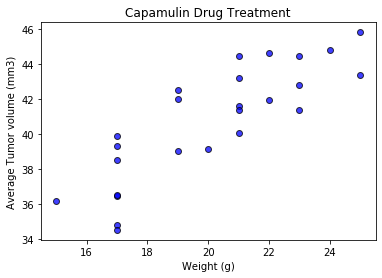

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
group_by_raton = capomulin_df.groupby(['Mouse ID'])
vol_average = group_by_raton.mean()
vol_average_df = pd.DataFrame(vol_average).reset_index()

x_values = vol_average_df['Weight (g)']
y_values = vol_average_df['Tumor Volume (mm3)']

plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor volume (mm3)')
plt.title('Capamulin Drug Treatment')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is : 0.842
The r-squared is: 0.7088568047708717


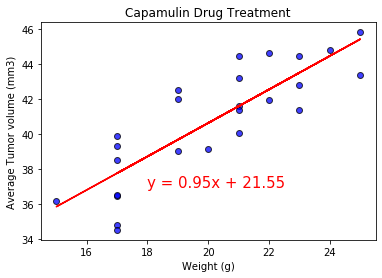

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = vol_average_df['Weight (g)']
y_values = vol_average_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor volume (mm3)')
plt.title('Capamulin Drug Treatment')
print(f"The correlation between mouse weight and the average tumor volume is : {round(rvalue,3)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()